## Dogs vs Cats
tring to classify between pictures of dogs & cats while refering to each pixle's 'grayscle' value as a feature

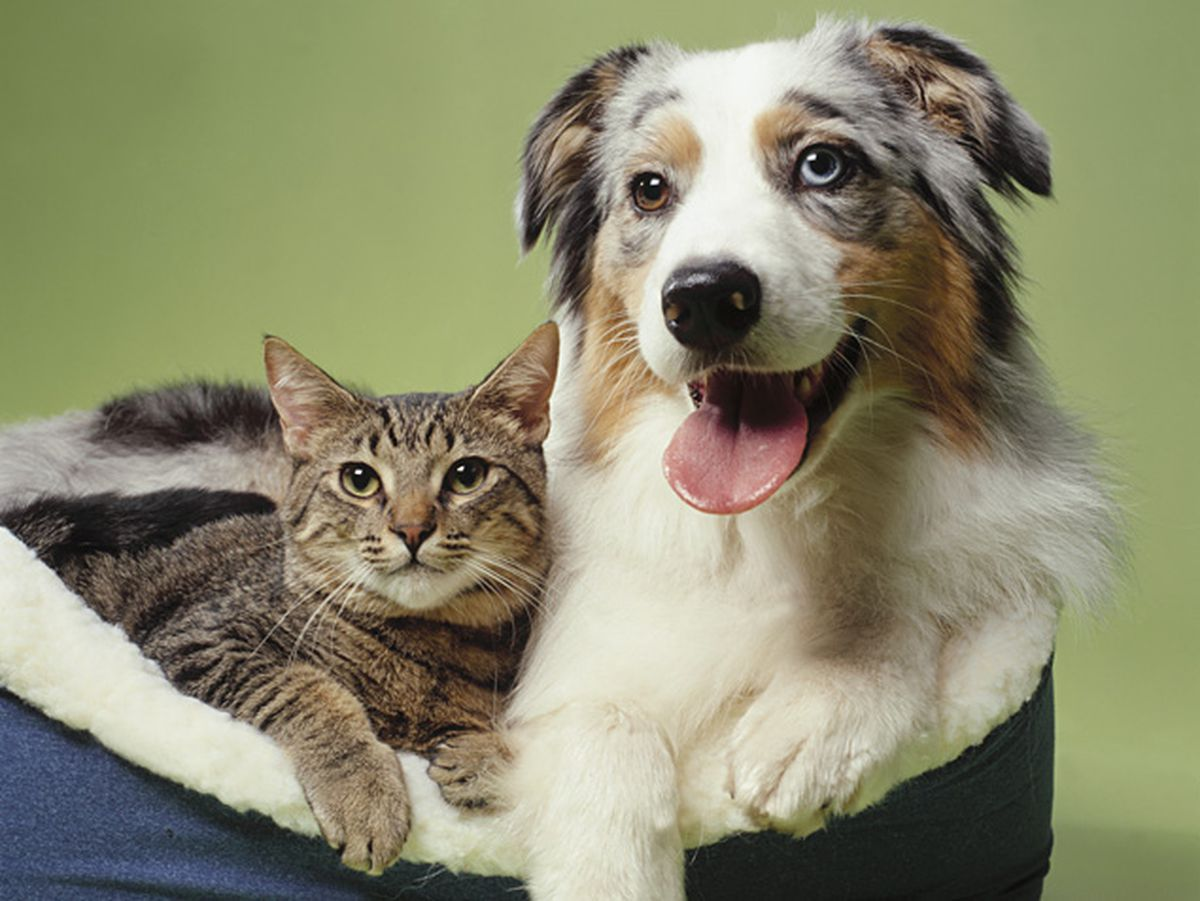

In [101]:
from IPython.display import Image
Image(filename = r'C:\Users\ישראל\DS\DataVisuallisition\CatsVSDogs\TitlePic.jpg', width = 500, height = 500)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import os
import cv2
import copy
import numpy as np
import pandas as pd
from random import shuffle
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn import metrics


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

In [2]:
TRAIN_DIR = r'C:\Users\israel\DS\DataVisuallisition\CatsVSDogs\catsVSdogs_train'
TEST_DIR = r'C:\Users\israel\DS\DataVisuallisition\CatsVSDogs\catsVSdogs_test'
IMG_SIZE = 50

def label_img(img):
    label = img.split('.')[-3]
    if label == 'cat': return 0
    elif label == 'dog': return 1
    

def prosses_img_data():
    train_data = []
    train_labels = []
    test_data = []
    
    
    for img in os.listdir(TRAIN_DIR):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        train_data.append(pd.DataFrame(np.array(img).reshape(1,2500)[0]).T)
        train_labels.append(label)
        
    for img in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        test_data.append(pd.DataFrame(np.array(img).reshape(1,2500)[0]).T)
    
    x = list(zip(train_data,train_labels))
    shuffle(x)
    y = list(zip(*x))
    train_data = list(y[0])
    train_labels = list(y[1])
    
    train = pd.concat([pd.concat(train_data).reset_index(drop = True), pd.Series(train_labels).rename('target')], axis = 1)
    test =  pd.concat(test_data)
    return train, test

In [13]:
#train, test = prosses_img_data()
#np.save('prossesed_catsVSdogs_train', train)
#np.save('prossesed_catsVSdogs_test', test)
train = pd.DataFrame(np.load(r'C:\Users\ישראל\JupiterNoteBooks\prossesed_catsVSdogs_train.npy'))
test = pd.DataFrame(np.load(r'C:\Users\ישראל\JupiterNoteBooks\prossesed_catsVSdogs_test.npy'))
pics = np.load(r'C:\Users\ישראל\JupiterNoteBooks\prossesed_catsVSdogs_test.npy')[:-2]
train

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,17,135,138,132,139,133,136,130,132,128,...,234,233,234,234,235,232,227,218,190,0
1,77,84,125,153,156,202,147,98,96,110,...,144,202,177,142,153,153,137,180,133,1
2,100,106,128,113,102,118,103,120,133,108,...,192,177,174,189,189,182,164,173,178,0
3,206,207,206,196,195,197,198,191,199,252,...,108,108,108,106,103,101,102,108,114,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,94,81,79,80,83,89,102,114,130,145,...,78,67,62,67,68,102,84,57,45,0
24996,4,4,4,6,8,5,8,10,7,7,...,34,31,29,26,21,19,18,18,14,0
24997,70,77,70,81,75,80,83,88,95,100,...,153,151,151,161,158,49,27,17,14,0
24998,142,147,149,149,148,145,136,121,131,105,...,112,83,119,62,19,10,8,21,21,0


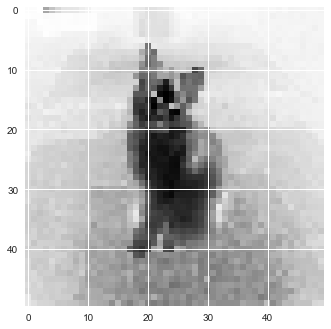

In [84]:
#this what an instance looks like
plt.imshow(pics[1].reshape(50,50))
plt.show()

In [14]:
target = train[2500]
train.drop(2500, axis = 1, inplace = True)

s = StandardScaler()
train = pd.DataFrame(s.fit_transform(train))

In [15]:
labels = []
subparts = []
lister = list(range(train.shape[1]))
rows = np.sqrt(train.shape[1]) # the side lenght of each picture

n = 0
for i in range(0, int(rows), 5): #different subparts of the picture(5x5 matrixes)
    for j in range(0, int(rows), 5):
        
        pixles = []
        for I in lister[i:i+5]:
            for J in lister[j:j+5]:
                pixles.append(int(I + (J*rows)))
        
        
        subparts.append(pixles)
        x = train[pixles].copy()
        clusterer = k_means(x, 5, max_iter = 500, n_jobs = -1) #Im letting each subpart to be classified into 5 different things
                                                               #Using k_means clustering
        labels.append(pd.Series(clusterer[1]).rename('clus' + str(len(list(train.columns)) + n)).reset_index(drop = True))
        n +=1
        
results = pd.concat(labels, axis = 1)
train = pd.concat([train, results], axis = 1)        
train.head()

,0,1,2,3,4,5,6,7,8,9,...,clus2590,clus2591,clus2592,clus2593,clus2594,clus2595,clus2596,clus2597,clus2598,clus2599
0,-1.401017,0.292217,0.325399,0.229351,0.319901,0.223726,0.258385,0.165314,0.193192,0.127359,...,4,1,4,3,4,4,0,3,3,4
1,-0.536137,-0.445723,0.136668,0.534276,0.566552,1.225464,0.417948,-0.300623,-0.330367,-0.134434,...,0,3,0,1,3,3,3,4,4,2
2,-0.204600,-0.127396,0.180221,-0.046533,-0.216927,0.005957,-0.220303,0.019709,0.207736,-0.163522,...,1,0,0,0,2,4,0,3,3,0
3,1.323354,1.334014,1.312611,1.158645,1.132397,1.152874,1.157738,1.053505,1.167595,1.930821,...,4,0,0,0,3,2,3,3,3,0
4,2.029673,2.028546,2.023984,2.015337,2.002929,1.994914,1.984562,1.985378,1.982021,1.974453,...,2,4,3,2,4,4,0,3,3,4


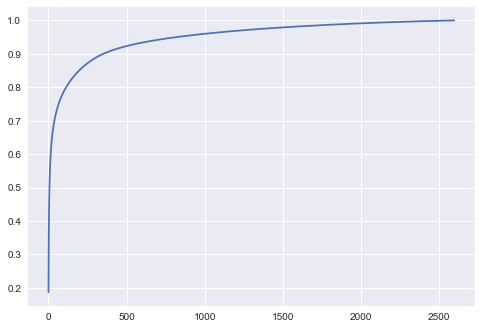

In [22]:
pca = PCA()
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

In [24]:
cumsum[350]

0.8998536309696602

In [25]:
pca = PCA(350)

train test split

In [26]:
X_train = train[:23000]  #already shuffled
Y_train = target[:23000]
X_test = train[23000:]
Y_test = target[23000:]

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test) # doesnt refit
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test) # same

### Aplying The Models

In [14]:
#the most basic model should  get an acurracy score of  0.5
#since their are equal amount of instances from each class

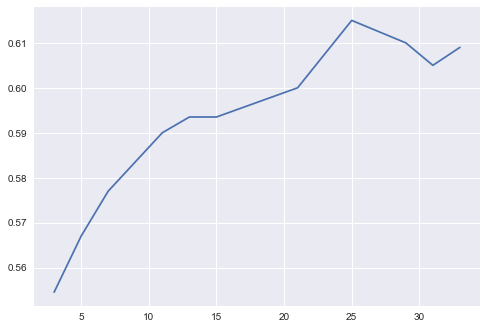

In [30]:
K_range = [3,5,7,9,11,13,15,21,25,29,31,33]
scores = []
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
    
plt.plot(K_range, scores)
plt.grid(True)
plt.show()

In [32]:
grid = {'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

G = GridSearchCV(KNeighborsClassifier(n_neighbors = 25), grid, cv = 4, n_jobs = -1)
G.fit(X_train, Y_train)
y_pred = G.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.6155


In [36]:
results_knn = pd.DataFrame(G.cv_results_)
results_knn.mean_test_score.sort_values(ascending = False)

7    0.606913
5    0.606913
3    0.606913
1    0.606913
6    0.606174
4    0.606174
2    0.606174
0    0.606174
Name: mean_test_score, dtype: float64

In [37]:
G.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [42]:
knn = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')

In [43]:
knn = BaggingClassifier(knn)
grid = {'max_features': [60,120,1.0], 'n_estimators':[15,20,25]}


G = GridSearchCV(knn, grid, cv = 4, n_jobs = -1)
G.fit(X_train, Y_train)
y_pred = G.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.6215


In [47]:
results_knn = pd.DataFrame(G.cv_results_)
results_knn.mean_test_score.sort_values(ascending = False).nlargest(5)

5    0.613348
4    0.610739
3    0.601870
2    0.578000
1    0.577435
Name: mean_test_score, dtype: float64

In [45]:
G.best_params_

{'max_features': 120, 'n_estimators': 25}

In [48]:
knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 25), max_features = 150, n_estimators = 25, n_jobs = -1)

In [50]:
rf = RandomForestClassifier(n_estimators = 250)
grid = {'min_samples_split':[20,30], 'max_features': [75,150,1.0]}


G = GridSearchCV(rf, grid, cv = 5, n_jobs = -1)
G.fit(X_train, Y_train)
y_pred = G.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.6135


In [51]:
results_rf = pd.DataFrame(G.cv_results_)
results_rf.mean_test_score.sort_values(ascending = False)

1    0.631304
4    0.630913
3    0.629652
0    0.627739
2    0.626696
5    0.625348
Name: mean_test_score, dtype: float64

In [52]:
G.best_params_

{'max_features': 75, 'min_samples_split': 30}

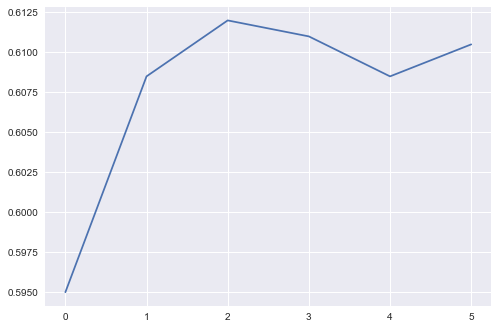

In [53]:
scores = []
for i in [5,7,9,11,13,15]:
    rf = RandomForestClassifier(max_depth = i, n_estimators = 250, max_features = 75, min_samples_split = 30, n_jobs = -1)
    rf.fit(X_train, Y_train)
    scores.append(metrics.accuracy_score(Y_test, rf.predict(X_test)))
plt.plot(range(6),scores)
plt.show()

In [ ]:
#looks like the defult is fine

In [56]:
#like random forest but with boosted trees
bt = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.4, min_samples_split = 30, max_depth = 9)
bf = BaggingClassifier(bt, n_estimators = 200, max_features = 40, max_samples = 0.4, n_jobs = -1)
bf.fit(X_train, Y_train)
y_pred = bf.predict(X_test)
metrics.accuracy_score(Y_test, y_pred)

0.6315

In [57]:
estimators = list(zip(['bf', 'knn'], [bf, knn]))

sc = StackingClassifier(estimators, n_jobs = -1)
sc.fit(X_train, Y_train)
y_pred = sc.predict(X_test)
metrics.accuracy_score(Y_test, y_pred)

0.6455

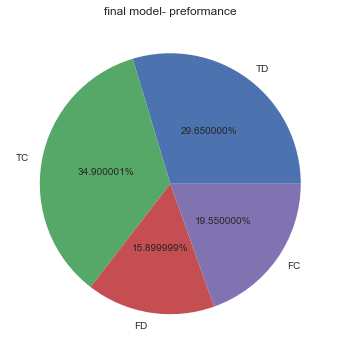

In [59]:
confusion = metrics.confusion_matrix(Y_test, y_pred)

#posetive - 1 - dog - D
#negative - 0 - cat - C

TP = confusion[1, 1] #pictures of dogs that have been identfied correctly
TN = confusion[0, 0] #pictures of cats that have been identfied correctly
FP = confusion[0, 1] #pictures of dogs that have been identfied incorrectly
FN = confusion[1, 0] #pictures of dogs that have been identfied incorrectly

plt.figure(figsize = (6,6))
plt.pie([TP,TN,FP,FN], labels = ['TD','TC','FD','FC'], autopct = '%2f%%', pctdistance = 0.5)
plt.title('final model- preformance')
plt.show()

In [61]:
pred_prob = pd.Series(sc.predict_proba(X_test)[:,1])

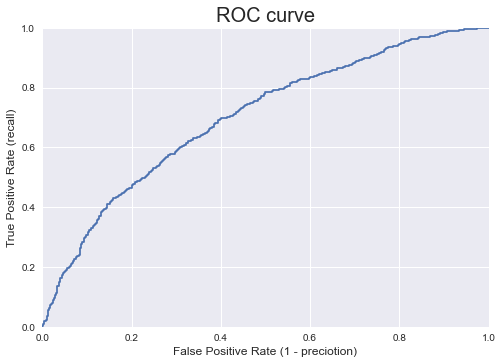

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve', fontsize = 20)
plt.xlabel('False Positive Rate (1 - preciotion)', fontsize = 12)
plt.ylabel('True Positive Rate (recall)', fontsize = 12)
plt.grid(True)
plt.show()

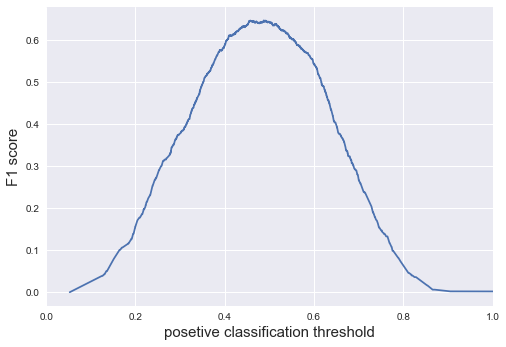

In [63]:
f1 = (2*(tpr*(1 - fpr)))/(tpr + (1 - fpr))


sns.lineplot(thresholds, f1)
plt.xlim([0.0, 1.0])
plt.ylabel('F1 score', fontsize = 15)
plt.xlabel('posetive classification threshold', fontsize = 15)
plt.show()

In [66]:
#no pacticular conclusion other than that the boostedForest was a nice trick
#and more importantly: that this is a job for CNN